In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
from patchify import patchify,unpatchify

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import MinMaxScaler
import segmentation_models as sm
from keras.utils import to_categorical

Segmentation Models: using `keras` framework.


In [2]:
path=os.getcwd()
folder=os.path.join(path,'project-5-at-2023')
image_folder=os.path.join(path,'test-20230105T115333Z-002')

mask_folder_parts=os.path.join(path,'mask_folder_parts')
os.mkdir(mask_folder_parts)
i=81

for name in os.listdir(image_folder):
    
    new_folder=os.path.join(mask_folder_parts,name)
    os.mkdir(new_folder)
    for image_name in os.listdir(folder):
        task='task-'+str(i)
        if task in image_name:
            image=cv2.imread(os.path.join(folder,image_name))
            cv2.imwrite(os.path.join(new_folder,image_name),image)
    i+=1

In [3]:
path=os.getcwd()
mask_folder=os.path.join(path,'mask_folder')
os.mkdir(mask_folder)
folder=os.path.join(path,'mask_folder_parts')

for img_label_folder in os.listdir(folder):
    folder_path=os.path.join(folder,img_label_folder)
    grass_images=[]
    water_images=[]
    home_images=[]
    way_images=[]

    for filename in os.listdir(folder_path):
        
        if 'grass' in filename:        
            grass_image=cv2.imread(os.path.join(folder_path,filename),0)
            h,w=grass_image.shape[:2]
            grass_image = np.where(grass_image>0,1,grass_image)
            grass_images.append(grass_image)

        elif 'water' in filename:        
            water_image=cv2.imread(os.path.join(folder_path,filename),0)
            h,w=water_image.shape[:2]
            water_image = np.where(water_image>0,2,water_image)
            water_images.append(water_image)

        elif 'home' in filename:        
            home_image=cv2.imread(os.path.join(folder_path,filename),0)
            h,w=home_image.shape[:2]
            home_image = np.where(home_image>0,3,home_image)
            home_images.append(home_image)
        elif 'way' in filename:        
            way_image=cv2.imread(os.path.join(folder_path,filename),0)
            h,w=way_image.shape[:2]
            way_image = np.where(way_image>0,4,way_image)
            way_images.append(way_image)
            
    proper_labels=[grass_images,water_images,home_images,way_images]
    mask=np.zeros((h,w),dtype='uint8')
    for i in range(len(proper_labels)):
        for label in proper_labels[i]:
            mask=np.where(label==i+1,i+1,mask)

    image_name=img_label_folder+'.png'
    cv2.imwrite(os.path.join(mask_folder,image_name),mask)

images divide to 256 size parts

In [4]:
patch_size=256

path=os.getcwd()
patch_img_path=os.path.join(path,'patch_images')
os.mkdir(patch_img_path)

image_fol_path=os.path.join(patch_img_path,'images')
os.mkdir(image_fol_path)

mask_fol_path=os.path.join(patch_img_path,'masks')
os.mkdir(mask_fol_path)

images_path=os.path.join(path,'test-20230105T115333Z-002')
for image_name in os.listdir(images_path):
    if image_name.endswith('.jpg'):
        image=cv2.imread(os.path.join(images_path,image_name))
        Size_x=(image.shape[1]//patch_size)*patch_size
        Size_y=(image.shape[0]//patch_size)*patch_size
        
        image=PIL.Image.fromarray(image)
        image=image.crop((0,0,Size_x,Size_y))
        image=np.array(image)
        
        patches_img=patchify(image,(patch_size,patch_size,3),step=patch_size)

        for i in range(patches_img.shape[0]):
            for j in range(patches_img.shape[1]):
                single_patch_image=patches_img[i,j,:,:]
                single_patch_image=single_patch_image[0]
                
                new_image_name=str(i)+str(j)+image_name
                cv2.imwrite(os.path.join(image_fol_path,new_image_name),single_patch_image)

mask_path=os.path.join(path,'mask_folder')
for image_name in os.listdir(mask_path):
    if image_name.endswith('.png'):
        mask=cv2.imread(os.path.join(mask_path,image_name),0)

        Size_x=(mask.shape[1]//patch_size)*patch_size
        Size_y=(mask.shape[0]//patch_size)*patch_size
        
        mask=PIL.Image.fromarray(mask)
        mask=mask.crop((0,0,Size_x,Size_y))
        mask=np.array(mask)
        patches_img=patchify(mask,(patch_size,patch_size),step=patch_size)

        for i in range(patches_img.shape[0]):
            for j in range(patches_img.shape[1]):
                single_patch_image=patches_img[i,j,:,:]
                print(single_patch_image.shape)
                
                new_image_name=str(i)+str(j)+image_name
                cv2.imwrite(os.path.join(mask_fol_path,new_image_name),single_patch_image)
        

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)

(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)

create data folder that contain relevent structure for training

In [2]:
path=os.getcwd()
directory = "data"
data_path=os.path.join(path,directory)
os.mkdir(data_path)

directory = "train_images"
train_images_path=os.path.join(data_path,directory)
# os.mkdir(train_images_path)

directory = "train"
train_path=os.path.join(train_images_path,directory)
# os.mkdir(train_path)

directory = "train_masks"
train_masks_path=os.path.join(data_path,directory)
# os.mkdir(train_masks_path)

directory = "train"
train_path_mask=os.path.join(train_masks_path,directory)
# os.mkdir(train_path_mask)

directory = "val_images"
valid_images_path=os.path.join(data_path,directory)
# os.mkdir(valid_images_path)

directory = "valid_img"
valid_path=os.path.join(valid_images_path,directory)
# os.mkdir(valid_path)

directory = "val_masks"
val_masks_path=os.path.join(data_path,directory)
# os.mkdir(val_masks_path)

directory = "valid_mask"
mask_train_path=os.path.join(val_masks_path,directory)
# os.mkdir(mask_train_path)

In [5]:
path=os.getcwd()
patch_images=os.path.join(path,'patch_images')

for folder in os.listdir(patch_images):
    folder_path=os.path.join(patch_images,folder)
    files=os.listdir(folder_path)
    file_num=len(files)
    num=int(file_num*20/100)
    
    for i in range(file_num-num):
        file_name=files[i]
        
        if folder=='images':
            image=cv2.imread(os.path.join(folder_path,file_name),1)
            cv2.imwrite(os.path.join(train_path,file_name),image)
        elif folder=='masks':
            image=cv2.imread(os.path.join(folder_path,file_name),0)
            cv2.imwrite(os.path.join(train_path_mask,file_name),image)
    
    for i in range(file_num-num,file_num):
        file_name=files[i]
        
        if folder=='images':
            image=cv2.imread(os.path.join(folder_path,file_name),1)
            cv2.imwrite(os.path.join(valid_path,file_name),image)
        elif folder=='masks':
            image=cv2.imread(os.path.join(folder_path,file_name),0)
            cv2.imwrite(os.path.join(mask_train_path,file_name),image)        
            

training

In [3]:
physical_devices=tf.config.experimental.list_physical_devices('GPU')
print('num GPUs available:', len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

num GPUs available: 1


In [10]:
seed=24
batch_size=16
n_classes=5

scaler=MinMaxScaler()
Backbone='resnet34'
preprocess_input=sm.get_preprocessing(Backbone)

def preprocess_data(img,mask,num_class):
    img=scaler.fit_transform(img.reshape(-1,img.shape[-1])).reshape(img.shape)
    img=preprocess_input(img)
    mask=to_categorical(mask,num_class)
    
    return (img,mask)
    
    
def trainGenerator(train_img_path,train_mask_path,num_class):
    img_data_gen_args=dict(horizontal_flip=True,
                          vertical_flip=True,
                          fill_mode='reflect')
    image_datagen=ImageDataGenerator(**img_data_gen_args)
    mask_datagen=ImageDataGenerator(**img_data_gen_args)
    
    image_generator=image_datagen.flow_from_directory(
            directory=train_img_path,
            class_mode=None,
            batch_size=batch_size,
            seed=seed)
    mask_generator = mask_datagen.flow_from_directory(
        train_mask_path,
        class_mode = None,
        color_mode = 'grayscale',
        batch_size = batch_size,
        seed = seed)
    
    train_generator=zip(image_generator,mask_generator)
    for (img,mask) in train_generator:
        img,mask=preprocess_data(img,mask,num_class)
        
        yield (img,mask)
    
train_img_gen=trainGenerator(train_images_path,train_masks_path, num_class=5)
val_img_gen=trainGenerator(valid_images_path,val_masks_path,num_class=5)

x,y=train_img_gen.__next__()
x_val,y_val=val_img_gen.__next__()
    

Found 5324 images belonging to 1 classes.
Found 5324 images belonging to 1 classes.
Found 1330 images belonging to 1 classes.
Found 1330 images belonging to 1 classes.


In [11]:
seed=24
batch_size=16
n_classes=5
Backbone='resnet34'
main_path=os.getcwd()

num_train_imgs=len(os.listdir(train_path))
num_valid_imgs=len(os.listdir(valid_path))
steps_per_epochs=num_train_imgs//batch_size
val_steps_epochs=num_valid_imgs//batch_size

IMG_HEIGHT=x.shape[1]
IMG_WIDTH=x.shape[2]
IMG_CHANNELS=x.shape[3]

model = sm.Unet(Backbone,encoder_weights='imagenet',
               input_shape=(IMG_HEIGHT, IMG_WIDTH,IMG_CHANNELS),
               classes=n_classes, activation='softmax')
model.compile('Adam',loss=sm.losses.categorical_focal_dice_loss,
             metrics=[sm.metrics.iou_score])
print(model.summary())


In [6]:
from keras import callbacks
checkpoint = callbacks.ModelCheckpoint('landcover_5_epochs_RESNET_backbone_batch16.h5', verbose=1, save_best_only=True)
callbacks = [
    callbacks.EarlyStopping(patience=2,monitor='val_loss'),
    callbacks.TensorBoard(log_dir='logs')
]

In [12]:
from keras import callbacks
checkpoint = callbacks.ModelCheckpoint('landcover_5_epochs_RESNET_backbone_batch16.h5', verbose=1, save_best_only=True)

In [ ]:
history=model.fit(train_img_gen,
                 steps_per_epoch=steps_per_epochs,
                 epochs=500,
                verbose=1,
                  validation_data=val_img_gen,
                  validation_steps=val_steps_epochs,
                  callbacks=checkpoint
                 )

In [21]:
model.save('last_epochs.hdf5')

In [22]:
model.save('last_epochs.h5')

In [ ]:
loss = history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'y',label='training_loss')
plt.plot(epochs,val_loss,'r',label='validation_loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc =history.history['iou_score']
val_acc=history.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training IoU')
plt.plot(epochs,val_acc,'r', label='Validation IoU')
plt.title('training and validation IoU')
plt.xlabel('Epochs')
plt.ylabel("IoU")
plt.legend()
plt.show()

1/1 [==============================] - 0s 23ms/step


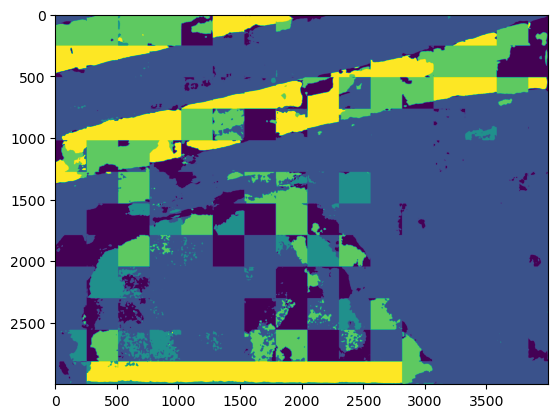

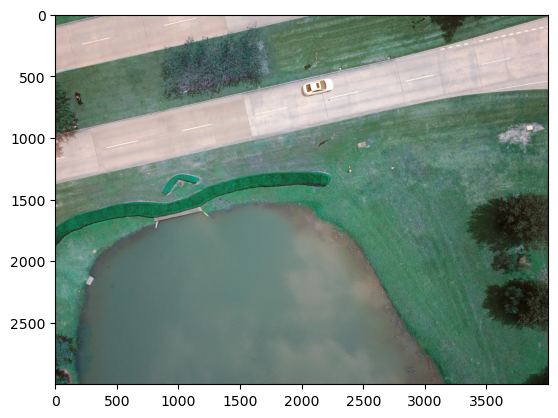

In [178]:
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

test_img=cv2.imread("test_images/7821.jpg",1)
h,w = test_img.shape[:2]

model = load_model("last_epochs.hdf5", compile=False)

patch_size=256
n_classes=5

SIZE_X=((test_img.shape[1]//patch_size)+1)*patch_size
SIZE_Y=((test_img.shape[0]//patch_size)+1)*patch_size
LARGE_image=PIL.Image.fromarray(test_img)
LARGE_image=LARGE_image.crop((0,0,SIZE_X,SIZE_Y))
LARGE_image=np.array(LARGE_image)

patches_img=patchify(LARGE_image,(patch_size,patch_size,3),step=patch_size)
patches_img=patches_img[:,:,0,:,:,:]

patched_production=[]
for i in range(patches_img.shape[0]):
    for j in range(patches_img.shape[1]):
        single_patch_img=patches_img[i,j,:,:,:]
        
        single_patch_img=scaler.fit_transform(single_patch_img.reshape
                                    (-1,single_patch_img.shape[-1])).reshape(single_patch_img.shape)

        single_patch_img=np.expand_dims(single_patch_img,axis=0)
        pred=model.predict(single_patch_img)
        pred=np.argmax(pred,axis=3)
        pred=pred[0,:,:]
        
        patched_production.append(pred)

patched_production=np.array(patched_production)
patched_production=np.reshape(patched_production, [patches_img.shape[0], patches_img.shape[1], 
                                            patches_img.shape[2], patches_img.shape[3]])

unpatched_production=unpatchify(patched_production, (LARGE_image.shape[0], LARGE_image.shape[1]))

binary_array=np.zeros((h,w),dtype='uint16')
for i in range(h):
    for j in range(w):
        binary_array[i,j]=unpatched_production[i,j]
        
        
plt.imshow(binary_array)
plt.figure()
plt.imshow(test_img)
plt.show()

checking correct of labels

In [174]:
testarray=binary_array
testarray=np.where(binary_array==2,255,testarray)
testarray=np.where(binary_array!=2,0,testarray)

In [ ]:
plt.imshow(testarray,cmap='gray')

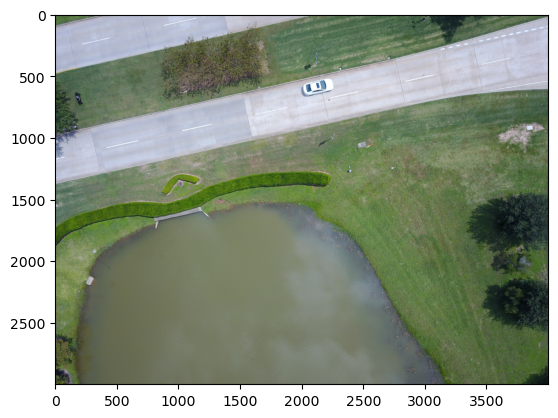

In [167]:
test_img=cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB)
plt.imshow(test_img)